### 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
%matplotlib inline

In [3]:
path = 'C:/Users/hnguy/OneDrive/Documents/Achievement 6'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'ratings_data_cleaned.csv'))

In [5]:
df.columns

Index(['Company/Creator', 'Specific Bean Origin', 'REF', 'Review Date',
       'Cocoa Percent', 'Company Location', 'Rating', 'Broad Bean Origin'],
      dtype='object')

In [6]:
df.drop(columns = ["Company/Creator", "Specific Bean Origin", "REF", "Company Location", "Broad Bean Origin"], inplace=True)

In [7]:
df.head()

,Review Date,Cocoa Percent,Rating
0,2016,0.63,3.75
1,2015,0.70,2.75
2,2015,0.70,3.00
3,2015,0.70,3.50
4,2015,0.70,3.50


### 2. The elbow technique

In [8]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [9]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-15789.176444345405,
 -4532.831019150644,
 -2165.2452828170394,
 -1449.662767837297,
 -1026.0926869203183,
 -816.0052412774047,
 -683.2497545519374,
 -588.5409316439003,
 -521.416404554558]

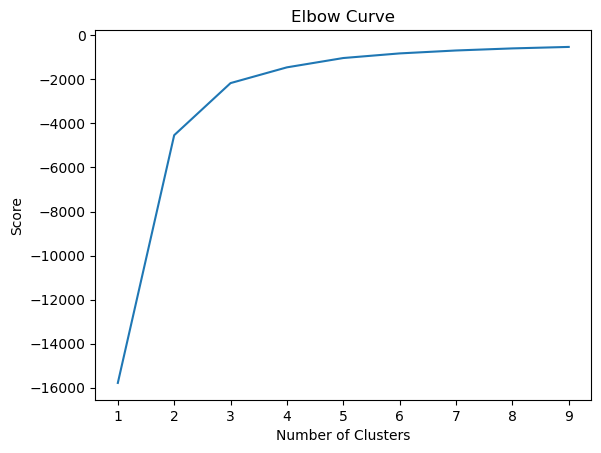

In [10]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

After the 3rd cluster, the line starts to straighten out so the optimal count for clusters is three.

### 3. k-means clustering

In [11]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [12]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=3)

In [13]:
df['clusters'] = kmeans.fit_predict(df)

In [14]:
df.head()

,Review Date,Cocoa Percent,Rating,clusters
0,2016,0.63,3.75,1
1,2015,0.70,2.75,1
2,2015,0.70,3.00,1
3,2015,0.70,3.50,1
4,2015,0.70,3.50,1


In [15]:
df['clusters'].value_counts()

1    775
0    655
2    365
Name: clusters, dtype: int64

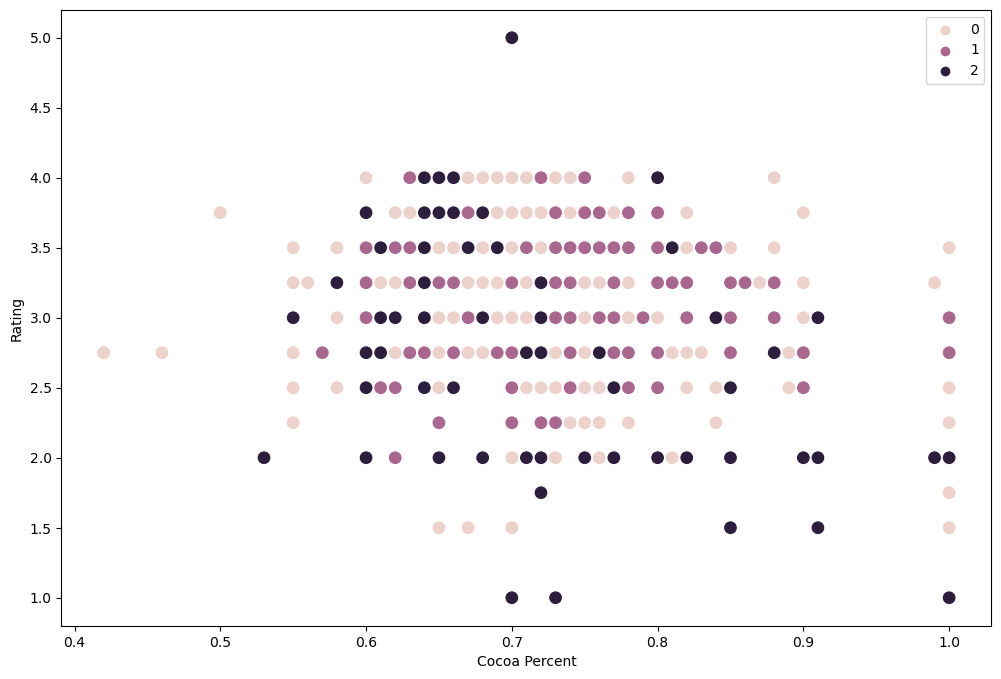

In [19]:
# Plot the clusters for the "Cocoa Percent" and "Rating" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Cocoa Percent'], y=df['Rating'], hue=kmeans.labels_, s=100) 


ax.grid(False) # This removes the grid from the background.
plt.xlabel('Cocoa Percent') # Label x-axis.
plt.ylabel('Rating') # Label y-axis.
plt.show()

The dark purple cluster mostly represents the chocolate bars with lower than average cocoa percent and ranges from 2 - 4 in ratings. The purple cluster mostly represents the bars with higher than average cocoa percent and also ranges from 2 - 4 in ratings. As for the pink cluster, it contains bars with a variety of cocoa percentages and ratings. Overall, I would say the clusters do not make sense since the data points in the clusters are not consistent.

In [20]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [22]:
df.groupby('cluster').agg({'Cocoa Percent':['mean', 'median'], 
                         'Rating':['mean', 'median']})

Cocoa Percent           Rating       
                     mean median      mean median
cluster                                          
dark purple      0.714658    0.7  3.082192   3.00
pink             0.714687    0.7  3.198092   3.25
purple           0.720065    0.7  3.224516   3.25

Looking at the statistics, I can see that the mean and median is similar for the clusters of "Cocoa Percent" and "Rating". These results does not provide much insight but it does tell me that the clusters do no make sense and therefore I need to explore the data further.